In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.linalg import solve_banded
from scipy import sparse
import seaborn as sns

#y[0] = 0.1*x**4 - 0.4*x**3 
l = 2
y[0] = l*(x**4)/4 + l*x**3 - 9*l*x*x/2
y[0] = 0*np.sin(4*np.pi*x)
al = eta*dt/(h*h*h*h)
b = y[0].copy()
for t in range(1, m):
    A[0, 0] = 1
    A[1, 0] = -3/2
    A[1, 1] = 2
    A[1, 2] = -1/2
    #A[1, 3] = al
    A[-2, -1] = 2
    A[-2, -2] = -5
    A[-2, -3] = 4
    A[-2, -4] = -1
    
    A[-1, -1] = 5/2
    A[-1, -2] = -9
    A[-1, -3] = 12
    A[-1, -4] = -7
    A[-1, -5] = 3/2
    for i in range(2, n-2):
        A[i, i] = 6*al + 1
        A[i, i-1] = -4*al
        A[i, i+1] = -4*al
        A[i, i-2] = al
        A[i, i+2] = al
    b = (y[t-1]).copy()
    b[0] = 0.5*np.sin(4*dt*t)
    b[1] = 0
    b[-1] = 0
    b[-2] = 0
    #ab = diagonal_form(A, 2, 4)
    y[t] = np.linalg.solve(A, b) # 50 seconds
    #y[t] = solve_banded((4,2), ab, b)

sol1 = y.copy()
np.abs(y).max()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-np.abs(y).max(), np.abs(y).max())
ax.grid()
line, = ax.plot(x, y[0])
point = ax.scatter(0, 0, marker='x')
def update(fn):
    line.set_data(x, y[100*fn])
    point.set_label(f'Time: {100*fn*dt:.4f}')
    ax.legend()

animation = FuncAnimation(fig, update, interval=50, save_count=100)
HTML(animation.to_jshtml())

In [2]:
X = 0.631
T = 50

n = 2000 # Number of points
m = 50000 # Timesteps
y = np.zeros((m, n), dtype=np.cdouble) # Solution array

A = np.zeros((n, n)) # A-matrix
b = np.zeros(n, dtype=np.cdouble) # b-vector

A_l = 1
xi_p = 1
omega = 4.5
l0 = (A_l/(xi_p*omega))**(1/4)

def analytical_y(l0, x, t):
    c8 = np.cos(np.pi/8)
    s8 = np.sin(np.pi/8)
    chi = x/l0
    return 0.5*(np.exp(-c8*chi)*np.cos(omega*t + s8*chi)+np.exp(-s8*chi)*np.cos(omega*t - c8*chi))

eta = A_l/xi_p
L = 100*l0
x = np.linspace(0, L, n) # Grid
times = np.linspace(0, T, m)
h = L/(n-1) # Grid spacing
dt = T/(m-1)
s = eta*dt/(h**4)
l0, eta

(0.6865890479690392, 1.0)

In [3]:
#y[0] = 0.1*x**4 - 0.4*x**3 
#l = 2
#y[0] = l*(x**4)/4 + l*x**3 - 9*l*x*x/2
#y[0] = 0*x
y[0] = 0*x
al = eta*dt/(h*h*h*h)
b = y[0].copy()
for t in range(1, m):
    Ab = np.zeros((7, n))
    Ab[0, 4:] = al
    Ab[1, 3:-1] = -4*al
    Ab[2, 2:-2] = 6*al + 1
    Ab[3, 1:-3] = -4*al
    Ab[4, :-4] = al
    
    Ab[2, 0] = 1

    Ab[3, 0] = 2/(h*h)
    Ab[2, 1] = -5/(h*h)
    Ab[1, 2] = 4/(h*h)
    Ab[0, 3] = -1/(h*h)

    Ab[1, -1] = 2/(h*h)
    Ab[2, -2] = -5/(h*h)
    Ab[3, -3] = 4/(h*h)
    Ab[4, -4] = -1/(h*h)

    Ab[-5, -1] = 5/2
    Ab[-4, -2] = -9
    Ab[-3, -3] = 12
    Ab[-2, -4] = -7
    Ab[-1, -5] = 3/2
    b = (y[t-1]).copy()
    b[0] = np.cos(omega*dt*t)
    b[1] = 0

    b[-1] = 0
    b[-2] = 0
    y[t] = solve_banded((4,2), Ab, b)

0.9999999999756443


/home/xwlin/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/xwlin/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


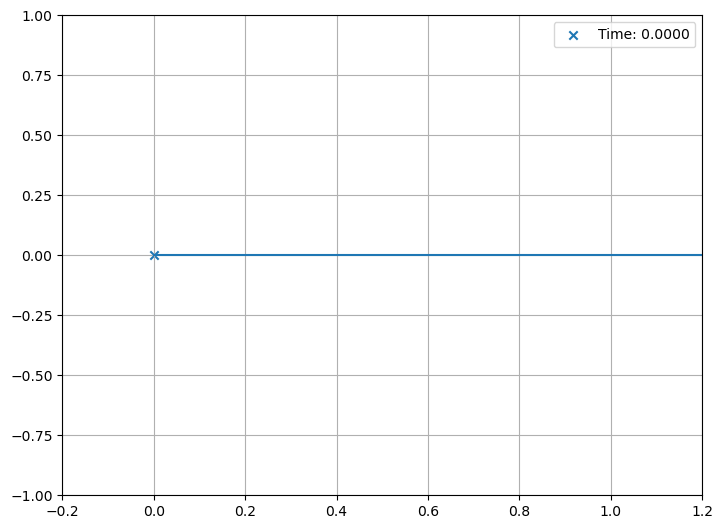

In [4]:
sol2 = y.copy()
print(np.abs(y).max())
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-1, 1)
ax.grid()
line, = ax.plot(x, y[0])
point = ax.scatter(0, 0, marker='x')
def update(fn):
    line.set_data(x, y[100*fn])
    point.set_label(f'Time: {100*fn*dt:.4f}')
    ax.legend()

animation = FuncAnimation(fig, update, interval=50, save_count=100)
HTML(animation.to_jshtml())

In [5]:
y2 = np.zeros((m, n), dtype=np.cdouble) # Solution array
for t in range(0, m):
    y2[t] = analytical_y(l0=l0, x=x, t=dt*t)

1.0


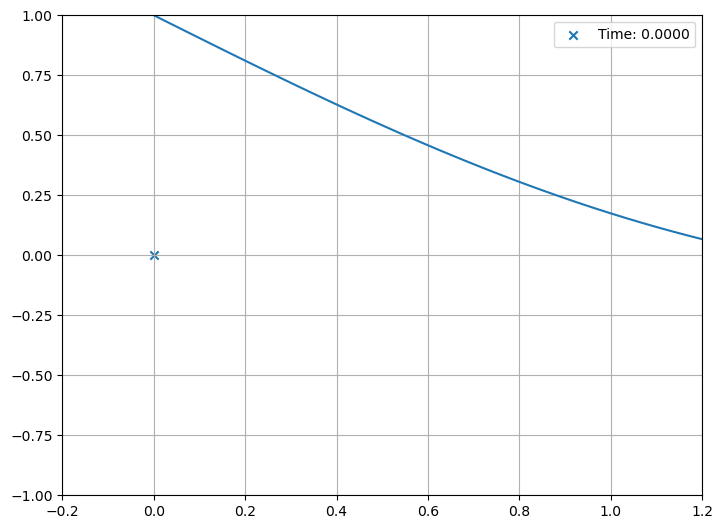

In [6]:
y = np.real(y2)
sol = y.copy()
print(np.abs(y).max())
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-1, 1)
ax.grid()
line, = ax.plot(x, y[0])
point = ax.scatter(0, 0, marker='x')
def update(fn):
    line.set_data(x, y[100*fn])
    point.set_label(f'Time: {100*fn*dt:.4f}')
    ax.legend()

animation = FuncAnimation(fig, update, interval=50, save_count=100)
HTML(animation.to_jshtml())

/home/xwlin/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/xwlin/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


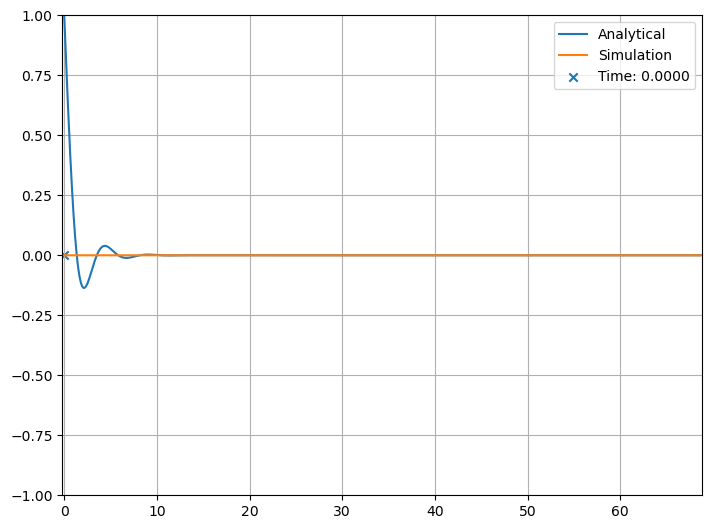

In [7]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(-0.2, L+0.2)
ax.set_ylim(-1, 1)
ax.grid()
line, = ax.plot(x, sol[0], label='Analytical')
line2, = ax.plot(x, sol2[0], label='Simulation')
point = ax.scatter(0, 0, marker='x')
def update(fn):
    line.set_data(x, sol[500*fn])
    line2.set_data(x, sol2[500*fn])
    point.set_label(f'Time: {500*fn*dt:.4f}')
    ax.legend()

animation = FuncAnimation(fig, update, interval=50, save_count=100)
HTML(animation.to_jshtml())

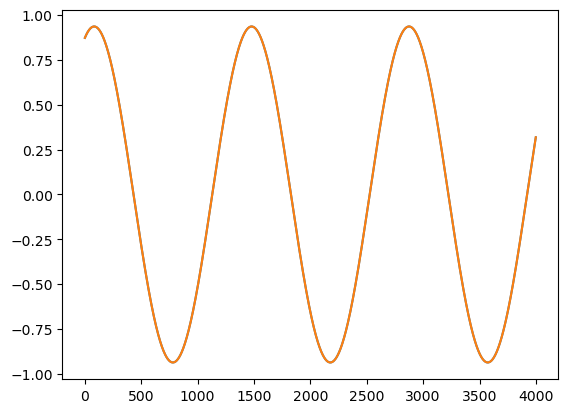

In [8]:
plt.plot(sol[-4000:, 2])
plt.plot(sol2[-4000:, 2])